In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import os
import math
from sklearn.linear_model import LinearRegression
import pandas as pd

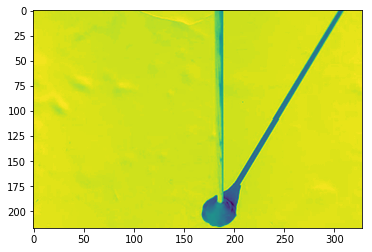

In [2]:
image = cv.imread('data1.jpg')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB) #Convert to RGB
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY) #Convert to gray

plt.imshow(gray)


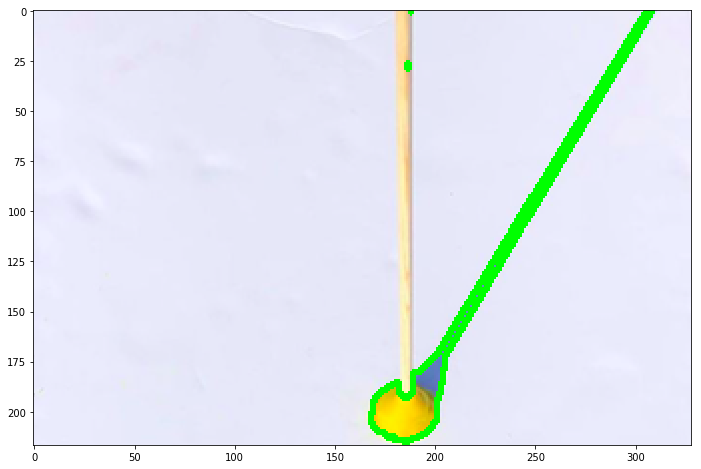

In [3]:
image = cv.imread('data1.jpg')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB) #Convert to RGB
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY) #Convert to gray

_, binary = cv.threshold(gray, 170, 255, cv.THRESH_BINARY_INV) #Set dark colors to white, and all other to black

_, contours, _ = cv.findContours(binary, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE) #Find the contour of shadow
image = cv.drawContours(image, contours, -1, (0, 255, 0), 2) # Create an image with contours

plt.figure(figsize=(15,8))
plt.imshow(image)
plt.show()

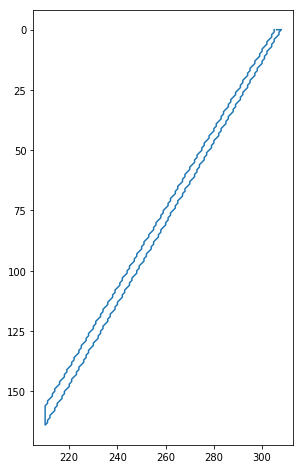

In [4]:
x = []
y = []
for k in contours:    # Sorts coordinates of contours into a neat nested list
    for i in k:
        for j in i:
            x.append(j[0])
            y.append(j[1])
merged = list(zip(x, y))

shadow_vector_x = []
shadow_vector_y = []

for i in merged:     # Select contour coordinates for only the shadow object
    if i[0]>=210 and i[1]<=170:
        shadow_vector_x.append(i[0])
        shadow_vector_y.append(i[1]) 
plt.figure(figsize=(15,8))        
plt.gca().invert_yaxis()
plt.gca().set_aspect('equal', adjustable='box')
plt.plot(shadow_vector_x,shadow_vector_y)

In [5]:
from scipy.optimize import curve_fit


def linearFunc(x,intercept,slope):
    y = intercept + slope * x
    return y

par,cov = curve_fit(linearFunc,shadow_vector_x,shadow_vector_y)

slope = par[1]
error_slope = (np.sqrt(np.diag(cov))[1])

print("Slope is:", abs(slope), "+/-", error_slope)

Slope is: 1.656528197139306 +/- 0.00619836763061331


In [6]:
linreg = LinearRegression()

x = np.array(shadow_vector_x)
y = np.array(shadow_vector_y)
x = x.reshape(-1,1)

linreg.fit(x, y)

angle1 = math.degrees(math.atan(abs(linreg.coef_)))
angle1_std = error_slope/(1+slope**2)    # Calculate uncertainty of angle from slope values
angle1_std = angle1_std*(180/math.pi)  # Convert uncertainty to degrees
print("Angle 1 =", angle1, "+/-", angle1_std)

Angle 1 = 58.88178758329333 +/- 0.0948536803385084


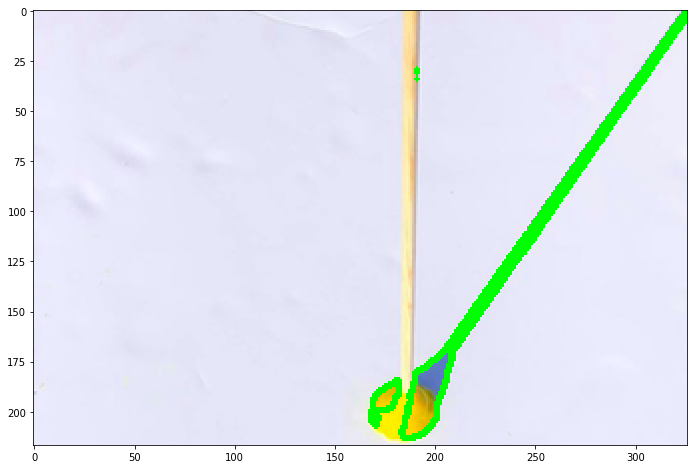

In [7]:
image = cv.imread('data2.jpg')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB) #Convert to RGB
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY) #Convert to gray

_, binary = cv.threshold(gray, 160, 255, cv.THRESH_BINARY_INV) #Set dark colors to white, and all other to black

_, contours, _ = cv.findContours(binary, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE) #Find the contour of shadow
image = cv.drawContours(image, contours, -1, (0, 255, 0), 2) # Create an image with contours

plt.figure(figsize=(15,8))
plt.imshow(image)
plt.show()

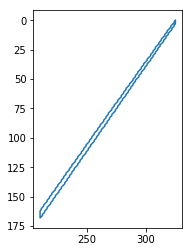

In [8]:
x = []
y = []
for k in contours:    # Sorts coordinates of contours into a neat nested list
    for i in k:
        for j in i:
            x.append(j[0])
            y.append(j[1])
merged = list(zip(x, y))

shadow_vector_x = []
shadow_vector_y = []

for i in merged:     # Select contour coordinates for only the shadow object
    if i[0]>=210 and i[1]<=170:
        shadow_vector_x.append(i[0])
        shadow_vector_y.append(i[1]) 
        
plt.gca().invert_yaxis()
plt.gca().set_aspect('equal', adjustable='box')
plt.plot(shadow_vector_x,shadow_vector_y)

In [9]:
from scipy.optimize import curve_fit


def linearFunc(x,intercept,slope):
    y = intercept + slope * x
    return y

par,cov = curve_fit(linearFunc,shadow_vector_x,shadow_vector_y)

slope = par[1]
error_slope = (np.sqrt(np.diag(cov))[1])

print("Slope is:", abs(slope), "+/-", error_slope)

Slope is: 1.42299581789706 +/- 0.004286491753124707


In [10]:
linreg = LinearRegression()

x = np.array(shadow_vector_x)
y = np.array(shadow_vector_y)
x = x.reshape(-1,1)

linreg.fit(x, y)

angle2 = math.degrees(math.atan(abs(linreg.coef_)))
angle2_std = error_slope/(1+slope**2)    # Calculate uncertainty of angle from slope values
angle2_std = angle2_std*(180/math.pi)  # Convert uncertainty to degrees
print("Angle 2 =", angle2, "+/-", angle2_std)

Angle 2 = 54.90264703668392 +/- 0.08119160903753533


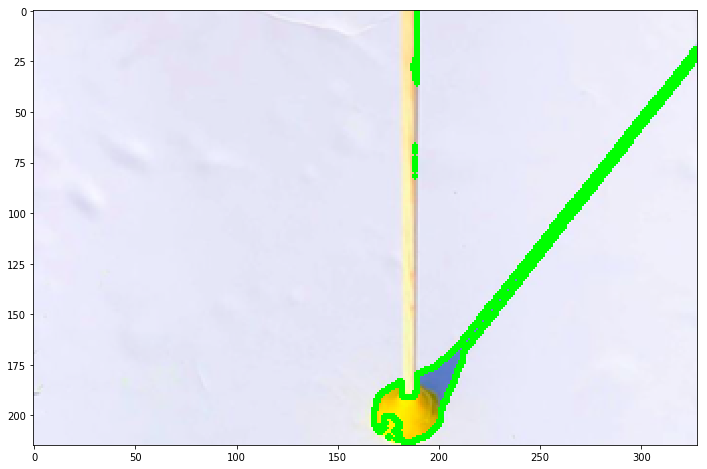

In [11]:
image = cv.imread('data3.jpg')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB) #Convert to RGB
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY) #Convert to gray

_, binary = cv.threshold(gray, 170, 255, cv.THRESH_BINARY_INV) #Set dark colors to white, and all other to black

_, contours, _ = cv.findContours(binary, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE) #Find the contour of shadow
image = cv.drawContours(image, contours, -1, (0, 255, 0), 2) # Create an image with contours

plt.figure(figsize=(15,8))
plt.imshow(image)
plt.show()

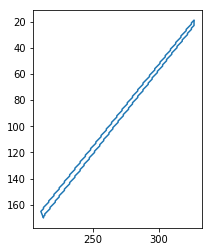

In [12]:
x = []
y = []
for k in contours:    # Sorts coordinates of contours into a neat nested list
    for i in k:
        for j in i:
            x.append(j[0])
            y.append(j[1])
merged = list(zip(x, y))

shadow_vector_x = []
shadow_vector_y = []

for i in merged:     # Select contour coordinates for only the shadow object
    if i[0]>=210 and i[1]<=170:
        shadow_vector_x.append(i[0])
        shadow_vector_y.append(i[1]) 
        
plt.gca().invert_yaxis()
plt.gca().set_aspect('equal', adjustable='box')
plt.plot(shadow_vector_x,shadow_vector_y)

In [13]:
from scipy.optimize import curve_fit


def linearFunc(x,intercept,slope):
    y = intercept + slope * x
    return y

par,cov = curve_fit(linearFunc,shadow_vector_x,shadow_vector_y)

slope = par[1]
error_slope = (np.sqrt(np.diag(cov))[1])

print("Slope is:", abs(slope), "+/-", error_slope)

Slope is: 1.2572633912597928 +/- 0.004530938550616813


In [14]:
linreg = LinearRegression()

x = np.array(shadow_vector_x)
y = np.array(shadow_vector_y)
x = x.reshape(-1,1)

linreg.fit(x, y)

angle3 = math.degrees(math.atan(abs(linreg.coef_)))
angle3_std = error_slope/(1+slope**2)    # Calculate uncertainty of angle from slope values
angle3_std = angle3_std*(180/math.pi)  # Convert uncertainty to degrees
print("Angle 3 =", angle3, "+/-", angle3_std)

Angle 3 = 51.50202248128048 +/- 0.10059384121031155


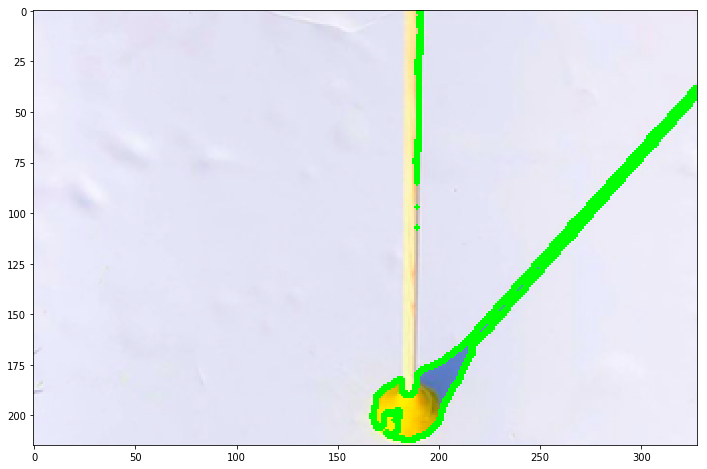

In [15]:
image = cv.imread('data4.jpg')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB) #Convert to RGB
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY) #Convert to gray

_, binary = cv.threshold(gray, 170, 255, cv.THRESH_BINARY_INV) #Set dark colors to white, and all other to black

_, contours, _ = cv.findContours(binary, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE) #Find the contour of shadow
image = cv.drawContours(image, contours, -1, (0, 255, 0), 2) # Create an image with contours

plt.figure(figsize=(15,8))
plt.imshow(image)
plt.show()

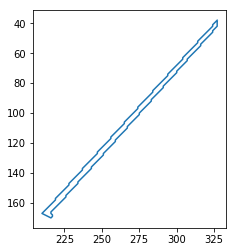

In [16]:
x = []
y = []
for k in contours:    # Sorts coordinates of contours into a neat nested list
    for i in k:
        for j in i:
            x.append(j[0])
            y.append(j[1])
merged = list(zip(x, y))

shadow_vector_x = []
shadow_vector_y = []

for i in merged:     # Select contour coordinates for only the shadow object
    if i[0]>=210 and i[1]<=170:
        shadow_vector_x.append(i[0])
        shadow_vector_y.append(i[1]) 
        
plt.gca().invert_yaxis()
plt.gca().set_aspect('equal', adjustable='box')
plt.plot(shadow_vector_x,shadow_vector_y)

In [17]:
from scipy.optimize import curve_fit


def linearFunc(x,intercept,slope):
    y = intercept + slope * x
    return y

par,cov = curve_fit(linearFunc,shadow_vector_x,shadow_vector_y)

slope = par[1]
error_slope = (np.sqrt(np.diag(cov))[1])

print("Slope is:", abs(slope), "+/-", error_slope)

Slope is: 1.1133348360668673 +/- 0.004790388042475227


In [18]:
linreg = LinearRegression()

x = np.array(shadow_vector_x)
y = np.array(shadow_vector_y)
x = x.reshape(-1,1)

linreg.fit(x, y)

angle4 = math.degrees(math.atan(abs(linreg.coef_)))
angle4_std = error_slope/(1+slope**2)    # Calculate uncertainty of angle from slope values
angle4_std = angle4_std*(180/math.pi)  # Convert uncertainty to degrees
print("Angle 4 =", angle4, "+/-", angle4_std)

Angle 4 = 48.06974226672803 +/- 0.12255737674804859


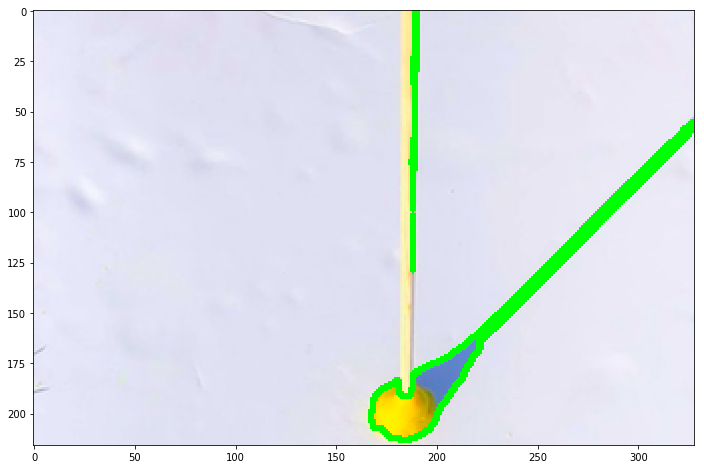

In [19]:
image = cv.imread('data5.jpg')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB) #Convert to RGB
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY) #Convert to gray

_, binary = cv.threshold(gray, 170, 255, cv.THRESH_BINARY_INV) #Set dark colors to white, and all other to black

_, contours, _ = cv.findContours(binary, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE) #Find the contour of shadow
image = cv.drawContours(image, contours, -1, (0, 255, 0), 2) # Create an image with contours

plt.figure(figsize=(15,8))
plt.imshow(image)
plt.show()

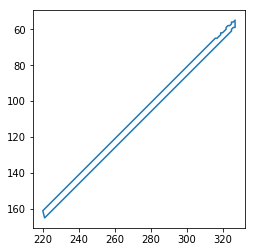

In [20]:
x = []
y = []
for k in contours:    # Sorts coordinates of contours into a neat nested list
    for i in k:
        for j in i:
            x.append(j[0])
            y.append(j[1])
merged = list(zip(x, y))

shadow_vector_x = []
shadow_vector_y = []

for i in merged:     # Select contour coordinates for only the shadow object
    if i[0]>=220 and i[1]<=165:
        shadow_vector_x.append(i[0])
        shadow_vector_y.append(i[1]) 
        
plt.gca().invert_yaxis()
plt.gca().set_aspect('equal', adjustable='box')
plt.plot(shadow_vector_x,shadow_vector_y)

In [21]:
from scipy.optimize import curve_fit


def linearFunc(x,intercept,slope):
    y = intercept + slope * x
    return y

par,cov = curve_fit(linearFunc,shadow_vector_x,shadow_vector_y)

slope = par[1]
error_slope = (np.sqrt(np.diag(cov))[1])

print("Slope is:", abs(slope), "+/-", error_slope)

Slope is: 0.9984182618249802 +/- 0.005174004404177891


In [22]:
linreg = LinearRegression()

x = np.array(shadow_vector_x)
y = np.array(shadow_vector_y)
x = x.reshape(-1,1)

linreg.fit(x, y)

angle5 = math.degrees(math.atan(abs(linreg.coef_)))
angle5_std = error_slope/(1+slope**2)   
angle5_std = angle5_std*(180/math.pi)  
print("Angle 5 =", angle5, "+/-", angle5_std)

Angle 5 = 44.95465068310294 +/- 0.14845894523745698


In [23]:
print("Angle 1 =", angle1, "+/-", angle1_std)
print("Angle 2 =", angle2, "+/-", angle2_std)
print("Angle 3 =", angle3, "+/-", angle3_std)
print("Angle 4 =", angle4, "+/-", angle4_std)
print("Angle 5 =", angle5, "+/-", angle5_std)

Angle 1 = 58.88178758329333 +/- 0.0948536803385084
Angle 2 = 54.90264703668392 +/- 0.08119160903753533
Angle 3 = 51.50202248128048 +/- 0.10059384121031155
Angle 4 = 48.06974226672803 +/- 0.12255737674804859
Angle 5 = 44.95465068310294 +/- 0.14845894523745698


In [24]:
delta1 = angle1-angle2
delta2 = angle2-angle3
delta3 = angle3-angle4
delta4 = angle4-angle5
total_delta = angle1-angle5

delta1_std = angle1_std+angle2_std
delta2_std = angle2_std+angle3_std
delta3_std = angle3_std+angle4_std
delta4_std = angle4_std+angle5_std
totaldelta_std = angle1_std+angle5_std


print(delta1, "+/-", delta1_std)
print(delta2, "+/-", delta2_std)
print(delta3, "+/-", delta3_std)
print(delta4, "+/-", delta4_std)
print(total_delta, "+/-", totaldelta_std)

3.9791405466094076 +/- 0.17604528937604375
3.4006245554034464 +/- 0.18178545024784687
3.432280214552449 +/- 0.22315121795836013
3.1150915836250874 +/- 0.27101632198550557
13.92713690019039 +/- 0.2433126255759654


In [25]:
# Formula:   

sol1 = (1/60)*15*(360/delta1)
sol1_std = (delta1_std/delta1)*(90/delta1)

sol2 = (1/60)*15*(360/delta2)
sol2_std = (delta2_std/delta2)*(90/delta2)

sol3 = (1/60)*15*(360/delta3)
sol3_std = (delta3_std/delta3)*(90/delta3)

sol4 = (1/60)*15*(360/delta4)
sol4_std = (delta4_std/delta4)*(90/delta4)

sol5 = (360/total_delta)
sol5_std = (totaldelta_std/total_delta)*(360/total_delta)


average = (sol1+sol2+sol3+sol4)/4
average_std = (sol1_std+sol2_std+sol3_std+sol4_std)/4

print(sol1, "+/-", sol1_std)
print(sol2, "+/-", sol2_std)
print(sol3, "+/-", sol3_std)
print(sol4, "+/-", sol4_std)

print("Using 1st and 5th angle, t=1 hour:",sol5, "+/-", sol5_std)
print("Average of times:", average, "+/-", average_std)

22.617949515929578 +/- 1.0006641939343952
26.46572667276482 +/- 1.4147648353889573
26.22163529026884 +/- 1.7048112293029665
28.89160642117154 +/- 2.5136008680061677
Using 1st and 5th angle, t=1 hour: 25.84881606176203 +/- 0.45158910615228653
Average of times: 26.049229475033695 +/- 1.6584602816581215


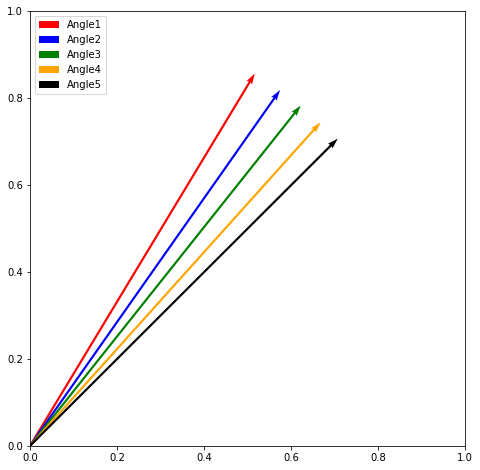

In [26]:
plt.figure(figsize=(15,8))
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.gca().set_aspect('equal', adjustable='box')


plt.quiver(0, 0, np.cos(angle1*np.pi/180), np.sin(angle1*np.pi/180), label="Angle1",color=['r'], scale=1, width = 0.005)
plt.quiver(0, 0, np.cos(angle2*np.pi/180), np.sin(angle2*np.pi/180), label='Angle2',color=['b'], scale=1, width = 0.005)
plt.quiver(0, 0, np.cos(angle3*np.pi/180), np.sin(angle3*np.pi/180), label='Angle3',color=['g'], scale=1, width = 0.005)
plt.quiver(0, 0, np.cos(angle4*np.pi/180), np.sin(angle4*np.pi/180), label='Angle4',color=['orange'], scale=1, width = 0.005)
plt.quiver(0, 0, np.cos(angle5*np.pi/180), np.sin(angle5*np.pi/180), label='Angle5',color=['black'], scale=1, width = 0.005)

plt.legend(loc='upper left')
plt.show()

In [27]:
angles = [angle1, angle2, angle3, angle4, angle5]
angles = [round(i,3) for i in angles]

angles_std = [angle1_std,angle2_std,angle3_std,angle4_std,angle5_std]
angles_std = [round(i,3) for i in angles_std]

deltas = [delta1,delta2,delta3,delta4]
deltas = [round(i,3) for i in deltas]
deltas.append('N/A')

deltas_std =  [delta1_std,delta2_std,delta3_std,delta4_std]
deltas_std = [round(i,3) for i in deltas_std]
deltas_std.append('N/A')

solutions = [sol1, sol2, sol3, sol4]
solutions = [round(i,3) for i in solutions]
solutions.append('N/A')

solutions_std = [sol1_std, sol2_std, sol3_std, sol4_std]
solutions_std = [round(i,3) for i in solutions_std]
solutions_std.append('N/A')

data = {'Angle':  angles,
        '+/-': angles_std,
         'Difference in angles' : deltas,
        '+/-.': deltas_std,
        'Extrapolated Time' : solutions,
        '+/-..' : solutions_std
        
        
        }

hi = pd.DataFrame (data, columns = ['Angle','+/-', 'Difference in angles', '+/-.', 'Extrapolated Time', '+/-..'])
hi.index += 1 
hi

,Angle,+/-,Difference in angles,+/-.,Extrapolated Time,+/-..
1,58.882,0.095,3.979,0.176,22.618,1.001
2,54.903,0.081,3.401,0.182,26.466,1.415
3,51.502,0.101,3.432,0.223,26.222,1.705
4,48.070,0.123,3.115,0.271,28.892,2.514
5,44.955,0.148,N/A,N/A,N/A,N/A


### Best extrapolated times come from 1st 15 minute interval, the average of deltas, and a 1 hour difference between ang5 and ang1

In [28]:
data = {'First interval':  [sol1],
         'Average of intervals' : [average],
        'Across 1 hour': [sol5],
        'Target value': [23.933]
        }

hi = pd.DataFrame(data, columns = ['First interval','Average of intervals', 'Across 1 hour', 'Target value'])

hi.loc['Standard deviations'] = [sol1_std,avg_std,sol5_std,23.933*.1]
hi.round(3)

NameError: name 'avg_std' is not defined

In [ ]:
plt.figure(figsize=(15,8))

plt.errorbar(1,sol1,yerr=sol1_std, fmt='X',label = 'Interval 1')
plt.errorbar(2,sol2,yerr=sol2_std, fmt='X',label = 'Interval 2')
plt.errorbar(3,sol3,yerr=sol3_std, fmt='X',label = 'Interval 3')
plt.errorbar(4,sol4,yerr=sol4_std, fmt='X',label = 'Interval 4')

x = np.linspace(1,4,4)
y = np.linspace(23.933,23.933,4)
plt.errorbar(x,y,yerr=2.393, fmt='X',label = "True Time", alpha=0.5)
plt.legend(loc='best')
plt.ylabel('Time (hours)')
plt.xlabel('Intervals')



In [ ]:
plt.figure(figsize=(15,8))

plt.errorbar(1,22.618,yerr=1.001, fmt='X',label = 'Interval 1')
plt.errorbar(2,26.049,yerr=1.581, fmt='X',label = 'Average of times')
plt.errorbar(3,25.849,yerr=0.452, fmt='X',label = 'Whole interval')

x = np.linspace(1,3,3)
y = np.linspace(23.933,23.933,3)
plt.errorbar(x,y,yerr=2.393, fmt='X',label = "True Time", alpha=0.5)
plt.legend(loc='best')
plt.ylabel('Time (hours)')
plt.xlabel('Intervals')

In [48]:
angles

[58.882, 54.903, 51.502, 48.07, 44.955]

In [66]:
x_comps = [np.cos(i*np.pi/180) for i in angles]
y_comps = [np.sin(i*np.pi/180) for i in angles]

In [67]:
x_comps

[0.5168023076105683,
 0.5749624130360635,
 0.6224873180801875,
 0.6682221845224683,
 0.7076619234072266]

In [68]:
y_comps

[0.8561047686167806,
 0.8181798235081008,
 0.7826298862357197,
 0.7439617679101664,
 0.7065512027868784]

In [69]:
y_comps = [(np.cos(31*np.pi/180)**1)*i for i in y_comps]
y_comps

[0.7338250136334523,
 0.7013169908053695,
 0.6708447470334731,
 0.6376997004251287,
 0.6056325873006594]

In [70]:
new_angles = []
for i in range(0,len(x_comps)):
    modified_angle = math.degrees(math.atan(y_comps[i]/x_comps[i]))
    new_angles.append(modified_angle)

In [71]:
new_angles

[54.84456300639715,
 50.65398871617096,
 47.14128034942081,
 43.66110584081844,
 40.55763654749565]

In [72]:
d1 = new_angles[0]-new_angles[1]
d2 = new_angles[1]-new_angles[2]
d3 = new_angles[2]-new_angles[3]
d4 = new_angles[3]-new_angles[4]

In [73]:
print(d1,d2,d3,d4)

4.190574290226195 3.5127083667501466 3.480174508602367 3.103469293322796
